In [1]:
import csv
import queue
import math
import json
import random
import time
import matplotlib.pyplot as plt
from BPC_TSP_Classes import *

import findspark

findspark.init()
findspark.find()

from pyspark.sql import SparkSession

DATA_JSON = "graphs_lower_dims.json"

# import pyspark

# number_cores = 8
# memory_gb = 24
# conf = (
#     pyspark.SparkConf()
#         .setMaster('local[{}]'.format(number_cores))
#         .set('spark.driver.memory', '{}g'.format(memory_gb))
# )
# sc = pyspark.SparkContext(conf=conf)

spark = SparkSession \
    .builder \
    .appName("BPC_TSP") \
    .config("spark.executor.instances", 4) \
    .config("spark.executor.cores", 4) \
    .master('local') \
    .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")

Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
S

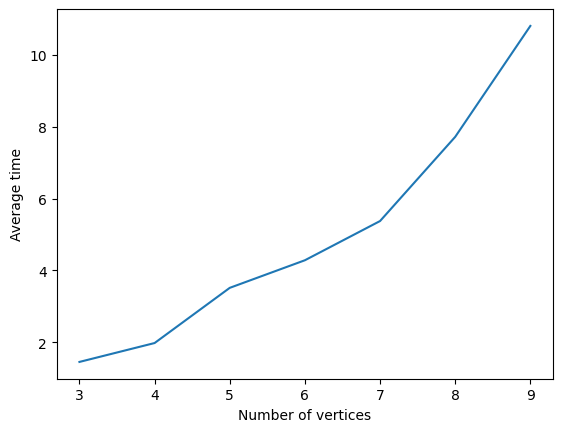

Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 3 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 4 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 5 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
Solved graph with 6 nodes.
S

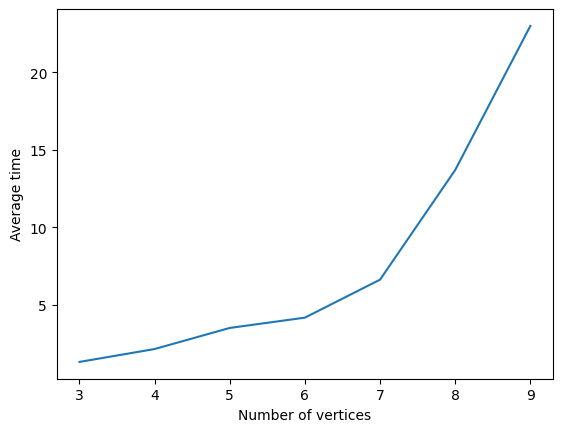

1:
0	inf	0
13	0	4
4	inf	0
Profit: 2
Path: [0, 2]

Calculation Time: 2.503563404083252
2:
0	4	15
8	0	2
10	inf	0
Profit: 32
Path: [0, 1, 2]

Calculation Time: 1.4723329544067383
4:
0	7	15
inf	0	2
6	4	0
Profit: 29
Path: [0, 1, 2]

Calculation Time: 1.434321641921997
8:
0	14	6
7	0	inf
5	3	0
Profit: 15
Path: [0, 2, 1]

Calculation Time: 1.4253220558166504
16:
0	7	11	4
6	0	1	9
3	5	0	10
7	0	0	0
Profit: 28
Path: [0, 3, 2, 1]

Calculation Time: 2.33807635307312
32:
0	inf	10	11	10	inf
9	0	0	11	inf	15
inf	inf	0	3	14	14
15	11	12	0	14	10
15	1	inf	11	0	11
inf	4	2	15	inf	0
Profit: 49
Path: [0, 4, 1, 2, 3, 5]

Calculation Time: 4.288965940475464
64:
0	inf	2	1	4	inf	15	3	14
inf	0	inf	11	2	15	12	11	1
4	2	0	15	13	inf	7	8	9
10	15	inf	0	5	7	2	1	9
4	1	inf	3	0	13	11	inf	1
2	11	0	3	9	0	9	8	inf
7	inf	10	11	7	9	0	11	inf
inf	3	0	10	9	10	inf	0	inf
inf	4	inf	6	7	inf	0	13	0
Profit: 74
Path: [0, 3, 7, 2, 1, 4, 8, 6, 5]

Calculation Time: 6.879644870758057
1:
0	inf	0
13	0	4
4	inf	0
Profit: 2
Path: [0, 2]

Calculation

<Figure size 640x480 with 0 Axes>

In [2]:
class SearchNodeQueue:
    def __init__(self):
        self._q = queue.PriorityQueue()
    
    def push(self, node):
        self._q.put((-node.bound, node))
    
    def pop(self):
        return self._q.get()[1]
    
    def empty(self):
        return self._q.empty()

class BBHelpers:
    @staticmethod
    def build_new_sn(prev_sn, t, bound_finder):
        new_vertex = t[0]
        new_capacity = prev_sn.capacity - t[1]
        prof_if_unvisited = t[2]
        new_visited = prev_sn.visited.copy()
        
        # NOTE: Probably doesn't need to be conditional anymore, as adjacent-node finder no longer considers visited
        if new_vertex in prev_sn.visited:
            new_profit = prev_sn.profit
        else:
            new_profit = prev_sn.profit + prof_if_unvisited
            new_visited.add(new_vertex)
        
        r = prev_sn.reduced_graph[0].get_reduced(prev_sn.vertex, prev_sn.reduced_graph[1], prev_sn.visited)
        
        new_path = prev_sn.path[:]
        if (prev_sn.vertex, new_vertex) in r[1]:
            new_path += r[1][(prev_sn.vertex, new_vertex)] + [new_vertex]
        else:
            new_path += [new_vertex]
        
        new_sn = SearchNode(vert=new_vertex,
                   path=new_path,
                   visited=new_visited,
                   profit_earned=new_profit,
                   remaining_capacity=new_capacity,
                   reduced_graph=r)
        new_sn.set_bound( bound_finder(r, new_sn) )
        return new_sn
    
    @staticmethod
    def process_search_node(sn_dat):
        (g, best_prof, sn, bound_finder) = sn_dat # Get named vars from passed tuple
        if sn.reduced_graph is None: # If root, just use main graph
            graph = g
        else: # Otherwise use reduced graph
            graph = sn.reduced_graph
        adj = graph[0].get_all_adjacent(sn.vertex, sn.visited) # Get data on all adjacent nodes (id, length of edge to the node, weight of the node) that have not yet been visited
        almost = [BBHelpers.build_new_sn(sn, x, bound_finder) for x in adj if x[1] <= sn.capacity] # Generate new search nodes, so long as new traversal does not go over capacity
        return [s for s in almost if s.bound > best_prof] # Filter out unpromising nodes
    
    
        
class BranchBoundSolver:
    def __init__(self, graph, num_threads, boundFunc):
        self._graph = graph
        self._num_threads = num_threads
        self.find_bound = boundFunc
        self._q = SearchNodeQueue()
        self.best_profit = 0
        self.best_path = []
        self.bound_data = None
    
    def pull_search_nodes(self):
        accum = [] # Will receive new search nodes, and then be parallelized
        nt = self._num_threads
        while not self._q.empty() and nt > 0:
            # Tuple members are: (The whole graph, the best found profit, the current node, the bound finding function, legacy; no longer used)
            accum.append( (self._graph, self.best_profit, self._q.pop(), self.find_bound) )# , self.bound_data) )
            nt -= 1
        return spark.sparkContext.parallelize(accum)
    
        
    
#     def solve(self, start_node):
#         first_sn = SearchNode(vert=start_node,
#                               path=[start_node],
#                               visited={start_node},
#                               profit_earned=self._graph.vert_weights[start_node],
#                               remaining_capacity=self._graph.limit)
#         self.bound_data = self.find_bound.setup(self._graph, first_sn)
        
#         first_sn.set_bound( self.find_bound.evaluate(self.bound_data, first_sn) )
#         best_possible = first_sn.bound
#         self._q.push(first_sn)
        
#         while not self._q.empty():
#             sns = self.pull_search_nodes()
#             new_sns = sns.flatMap(lambda x : BBHelpers.process_search_node(x))
#             new_best_candidate = new_sns.map(
#                 lambda s : (s.profit, s.path)
#             ).fold((0, []), lambda x, y : max(x, y, key=lambda t : t[0]))
            
#             if new_best_candidate[0] > self.best_profit:
#                 (self.best_profit, self.best_path) = new_best_candidate
#             if new_best_candidate[0] == best_possible:
#                 break
                
#             new_sns_arr = new_sns.collect()
#             for x in new_sns_arr:
#                 self._q.push(x)
#         return (self.best_profit, self.best_path)

    def solve(self, start_node):
        # Create root search node at starting vertex
        
        # Note: We don't need to remove visited node until we have left it, as we want access to its connected-node data.
        
        first_sn = SearchNode(vert=start_node,
                              path=[start_node],
                              visited={start_node},
                              profit_earned=self._graph.vert_weights[start_node],
                              remaining_capacity=self._graph.limit,
                              reduced_graph=(self._graph, {}))
        # Calculate bound based upon root and graph, and add to search node
        first_sn.set_bound( self.find_bound(self._graph, first_sn) )
        # Save root bound as best possible profit
        all_verts_sum = sum(self._graph.vert_weights)
        root_bound = first_sn.bound
        # Push initial search node into priority queue
        self._q.push(first_sn)

        # Loop continuously pops search nodes off queue, calculates new states (nodes) from them, and loads those new nodes back into queue.
        # Ends when there are no more nodes to process
        while not self._q.empty():
            sns = self.pull_search_nodes() # Pull several search nodes off of the queue (also attaching metadata to them) to be processed in parallel
            new_sns = sns.flatMap(lambda x : BBHelpers.process_search_node(x)) # Calculate new search nodes from current
            new_best_candidate = new_sns.map(
                lambda s : (s.profit, s.path)
            ).fold((0, []), lambda x, y : max(x, y, key=lambda t : t[0])) # Find best profit and associated path from calculated search node
            # If best profit from batch is greater than overall best profit, replace overall with this new best profit
            if new_best_candidate[0] > self.best_profit:
                (self.best_profit, self.best_path) = new_best_candidate
            
            # If best profit from batch is as great as the calculated best possible, then we can't do any better, so we're done.
            if new_best_candidate[0] == root_bound or new_best_candidate[0] == all_verts_sum:
                break
        
            # Push all new search nodes into the queue
            new_sns_arr = new_sns.collect()
            for x in new_sns_arr:
                self._q.push(x)
            
        # Once we know we can't do any better, return best found profit and associated path
        return (self.best_profit, self.best_path)
    
# Namespace
class DataSetup:
    @staticmethod
    def build_from_csvs(data):
        f = lambda x : math.inf if x == 'i' else int(x)
        acc = []
        dim = None

        with open(data['edge_w'], newline='') as edges_file:
            read_edges = csv.reader(edges_file)
            for row in read_edges:
                if dim == None:
                    dim = len(row)
                acc += [f(x) for x in row]
        grid = SquareMat(acc, dim)

        acc = []

        vert_weights = None
        with open(data['vert_w'], newline='') as verts_file:
            read_verts = csv.reader(verts_file)
            for row in read_verts:
                vert_weights = list( map(lambda x : int(x), row) )
        return BPC_TSP_Graph(grid, dim, vert_weights, data['lim'])

    @staticmethod
    def build_from_random(data):
        num_generations = data['num_generations']
        acc = []
        for i in range(num_generations):
            acc.append(DataSetup.build_single_from_random(data))

        return acc

    
    @staticmethod
    def build_single_from_random(data):
        grid_size = data['num_verts'] ** 2
        g_raw = [None for _ in range(grid_size)]
        percent_unconnected = data['percent_unconnected']
        for i in range(grid_size):
            if random.randrange(101) < percent_unconnected:
                g_raw[i] = math.inf
            else:
                g_raw[i] = random.randrange(data['max_edge_weight'] + 1)


        for i in range(data['num_verts']):
            g_raw[i * data['num_verts'] + i] = 0
        
        g = SquareMat(g_raw, data['num_verts'])

        w = [random.randrange(data['max_vert_weight'] + 1) for _ in range(g.dim)]

        mintotal = 0
        for row in range(data['num_verts']):
            mintotal += min(g.get_col(row))

        cap_policy = data['cap_range']['policy']

        cap = None
        if cap_policy == 'minsum':
            cap = DataSetup.capacity_from_minsum(data['cap_range']['attrs'], g, data['num_verts'])
        elif cap_policy == 'absolute':
            cap = DataSetup.capacity_from_absolute(data['cap_range']['attrs'])
        else:
            raise ValueError("Uh oh, spaghettio!")

        # debug_log(f"Built:\n{str(g)}\n")
        return BPC_TSP_Graph(g, data['num_verts'], w, cap)


    @staticmethod
    def capacity_from_absolute(attrs):
        return random.randrange(attrs['lower'], attrs['upper'])

    @staticmethod
    def capacity_from_minsum(cap_attrs, g, num_verts):
        mintotal = 0
        for row in range(g.dim):
            c_row = [n for n in g.get_col(row) if n > 0]
            row_min = min(c_row)
            mintotal += row_min if not math.isinf(row_min) else 0

        lower = mintotal * cap_attrs['lower_multiplier']
        upper = mintotal * cap_attrs['upper_multiplier']
        lower = int(lower)
        upper = int(upper)

        return random.randrange(lower, upper)

    def build_graphs(data):
        acc = []
        for d in data['file_defined']:
            acc.append(DataSetup.build_from_csvs(d))

        for d in data['randomized']:
            acc += DataSetup.build_from_random(d)

        return acc
    
class Tester:
    def __init__(self, graphs):
        self.graphs = graphs
    
    def solve_all(self, boundfunc):
        return [self.solve_graph_with_metrics(g, boundfunc) for g in self.graphs]
    
    def solve_graph_with_metrics(self, graph, boundfunc):
        solver = BranchBoundSolver(graph, 16, boundfunc)
        t = time.time()
        solution = solver.solve(0)
        t = time.time() - t
        print(f"Solved graph with {graph.dim} nodes.")
        return (solution, t)
    
    @staticmethod
    def is2pow(n):
        return (n & (n - 1) == 0)
    
    @staticmethod
    def print_some_results(graphs, solved):
        for idx, result in enumerate(solved):
            (solution, t) = result
            if Tester.is2pow(idx + 1):
                Tester.print_result(graphs[idx], result, idx + 1)
                
    @staticmethod
    def print_result(g, r, idx):
        print(f"{idx}:")
        for i in range(g.dim):
            row = g.grid.get_row(i)
            row = map(lambda x : str(x), row)
            row = "\t".join(row)
            print(row)
        print(f"Profit: {r[0][0]}")
        print(f"Path: {r[0][1]}\n")
        print(f"Calculation Time: {r[1]}")
        
    @staticmethod
    def make_result_string(g, r, idx):
        acc = ""
        acc += f"{idx}:\n"
        acc += str(g.grid) + "\n\n"
        joined = '\t'.join([str(v) for v in g.vert_weights])
        acc += f"Vertex Weights:\n{joined}\n"
        acc += f"Capacity: {g.limit}\n\n"
        acc += f"Profit: {r[0][0]}\n"
        acc += f"Path: {r[0][1]}\n"
        acc += f"Calculation Time: {r[1]}\n\n\n"
        return acc
    
    @staticmethod
    def output_all_results(graphs, solved, outfile):
        open(outfile, "w").close()
        with open(outfile, "a") as f:
            for idx, result in enumerate(solved):
                (solution, t) = result
                rstr = Tester.make_result_string(graphs[idx], result, idx + 1)
                f.write(rstr)
        
        
class Plotter:
    @staticmethod
    def key_reduce(pairs):
        acc = {}
        for pair in pairs:
            if pair[0] not in acc:
                acc[pair[0]] = (pair[1], 1) # (time taken, 1)
            else:
                vals_at_key = acc[pair[0]]
                acc[pair[0]] = (vals_at_key[0] + pair[1], vals_at_key[1] + 1)
        
        # Now acc[pair[0]] == (sum of times taken, amount of times taken)
        return [(k, p[0] / p[1]) for k, p in acc.items()] # Return list of (amount of vertices, average time taken for this amount)
    
    @staticmethod
    def print_average_times(times):
        for i, _ in enumerate(times[0]):
            print(f"Average time for {times[0][i]} nodes:\t{times[1][i]} seconds")
    
    @staticmethod
    def plot(graphs, results):
        times = [x[1] for x in results]
        node_amounts = [x.dim for x in graphs]
        
        zip_times = list(zip(node_amounts, times))
        reduce_times = Plotter.key_reduce(zip_times)
        
        unzip_times = zip(*reduce_times)
        processed_times = [list(x) for x in unzip_times]
        
        Plotter.print_average_times(processed_times)
        plt.plot(processed_times[0], processed_times[1])
        plt.ylabel('Average time')
        plt.xlabel('Number of vertices')
        plt.show()
        plt.clf()
        
    
#     @staticmethod
#     def plot(graphs, brute_force_results, minsums_results):
#         # Result-object: (solution, time-taken)
#         # Results-object: [Result-object_a, Result-object_b, ...]
#         bftimes = [x[1] for x in brute_force_results] # Get times for brute-force results
#         mstimes = [x[1] for x in minsums_results] # Get times for minsums results
#         node_amounts = [x.dim for x in graphs] # Get numbers of nodes for each graph
        
#         z_bft = list(zip(node_amounts, bftimes)) # [(node_ammount1, brute_force_time1), (node_ammount2, brute_force_time2), ...]
#         r_bft = Plotter.key_reduce(z_bft) # Reduce by key to take average of all times for each number of nodes
#         unzipped_bft = zip(*r_bft)
#         done_bft = [list(x) for x in unzipped_bft]
        
#         z_mst = list(zip(node_amounts, mstimes))
#         r_mst = Plotter.key_reduce(z_mst)
#         unzipped_mst = zip(*r_mst)
#         done_mst = [list(x) for x in unzipped_mst]
        
#         # Brute Force
#         plt.plot(done_bft[1], done_bft[0])
#         plt.ylabel('Average time')
#         plt.xlabel('Number of vertices')
#         plt.show()
        
#         # Minsums
#         plt.plot(done_mst[1], done_mst[0])
#         plt.ylabel('Average time')
#         plt.xlabel('Number of vertices')
#         plt.show()
            

def main():
    clear_debug_log()
    data = None
    with open(DATA_JSON) as j: 
        data = json.load(j)
    
    graphs = DataSetup.build_graphs(data)
        
    
    tester = Tester(graphs)
    
    solved_minbound = tester.solve_all(minbound_evaluate)
    Plotter.plot(graphs, solved_minbound)
    Tester.output_all_results(graphs, solved_minbound, "solved_minbound.txt")
    
    solved_brute_force = tester.solve_all(brute_force_evaluate)
    Plotter.plot(graphs, solved_brute_force)
    Tester.output_all_results(graphs, solved_brute_force, "solved_brute_force.txt")
    
    Tester.print_some_results(graphs, solved_minbound)
    Tester.print_some_results(graphs, solved_brute_force)
    
    # Plotter.plot(graphs, solved_brute_force, solved_minbound)

main()    
    
    